In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#reading the data and making date column as index
dataframe = pd.read_csv('/content/city_day.csv',parse_dates=['Date'],index_col=['Date']);
dataframe.head(5)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
#fetching the data for Delhi
Delhi_df = dataframe[dataframe['City'] == 'Delhi']

#dropping the unnecessary column
columns_to_drop = ['NH3', 'Benzene', 'Toluene','Xylene','AQI_Bucket','City','NO']
df = Delhi_df.drop(columns_to_drop,axis=1)
df.head(5)

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2015-01-01,313.22,607.98,36.39,110.59,15.20,9.25,41.68,472.0
2015-01-02,186.18,269.55,32.87,88.14,9.54,6.65,29.97,454.0
2015-01-03,87.18,131.90,30.31,47.95,10.61,2.65,19.71,143.0
2015-01-04,151.84,241.84,36.91,48.62,11.54,4.63,25.36,319.0
2015-01-05,146.60,219.13,34.92,38.25,9.20,3.33,23.20,325.0


In [ ]:
#checking the null and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2007 non-null   float64
 1   PM10    1932 non-null   float64
 2   NO2     2007 non-null   float64
 3   NOx     2009 non-null   float64
 4   CO      2009 non-null   float64
 5   SO2     1899 non-null   float64
 6   O3      1925 non-null   float64
 7   AQI     1999 non-null   float64
dtypes: float64(8)
memory usage: 141.3 KB


In [ ]:
df.isnull().sum()

PM2.5      2
PM10      77
NO2        2
NOx        0
CO         0
SO2      110
O3        84
AQI       10
dtype: int64

In [ ]:
#dropping the column if AQI is null and interpolating the independent data where it is null
df = df.dropna(subset=['AQI'])
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1999 entries, 2015-01-01 to 2020-07-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1999 non-null   float64
 1   PM10    1999 non-null   float64
 2   NO2     1999 non-null   float64
 3   NOx     1999 non-null   float64
 4   CO      1999 non-null   float64
 5   SO2     1999 non-null   float64
 6   O3      1999 non-null   float64
 7   AQI     1999 non-null   float64
dtypes: float64(8)
memory usage: 140.6 KB


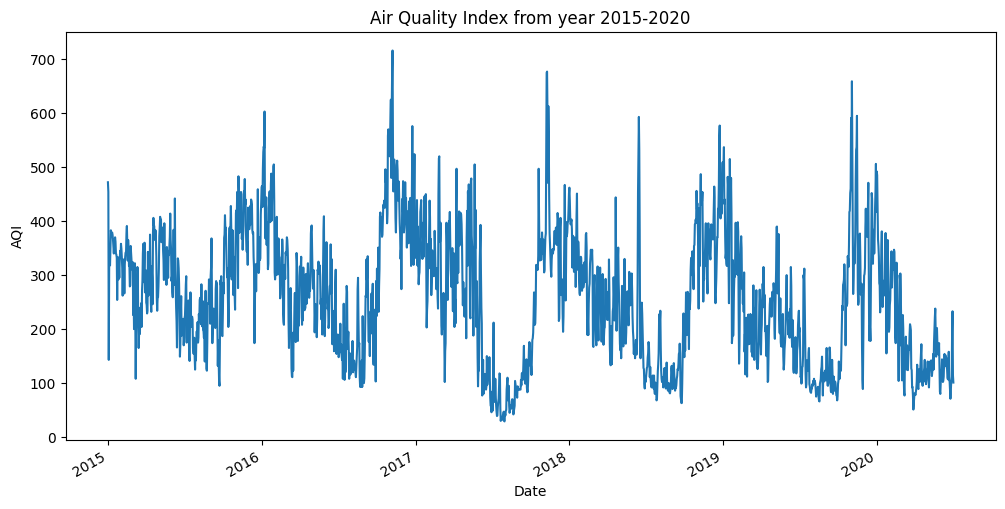

In [ ]:
df['AQI'].plot(figsize=(12, 6))
plt.title('Air Quality Index from year 2015-2020')
plt.xlabel('Date')
plt.ylabel('AQI')

# show the plot
plt.show()


In [ ]:
# import statsmodels.api as sm
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = sm.tsa.seasonal_decompose(df,model='additive')

<Axes: title={'center': 'MONTHLY AVERAGE EMISSION FROM THE YEAR JANUARY 2015- JUNE 2020'}, xlabel='Date'>

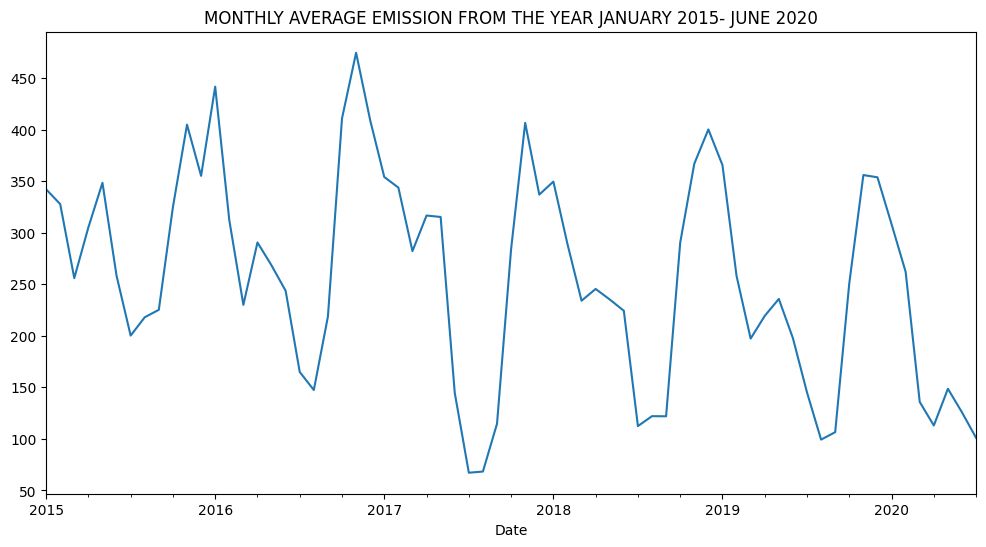

In [ ]:
df['AQI'].resample('M').mean().plot(figsize=(12,6),title='MONTHLY AVERAGE EMISSION FROM THE YEAR JANUARY 2015- JUNE 2020')

**Resampling**

**Stationary Check**


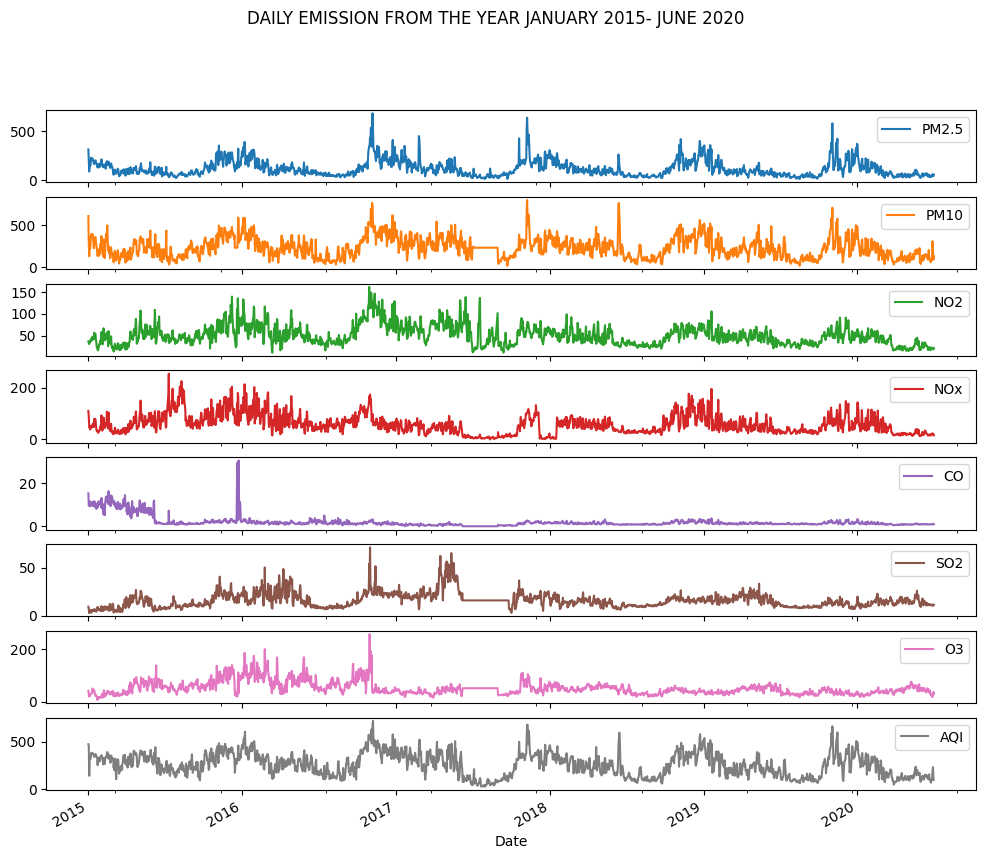

In [ ]:
df.plot(subplots=True,figsize=(12, 10),title='DAILY EMISSION FROM THE YEAR JANUARY 2015- JUNE 2020')
plt.show()

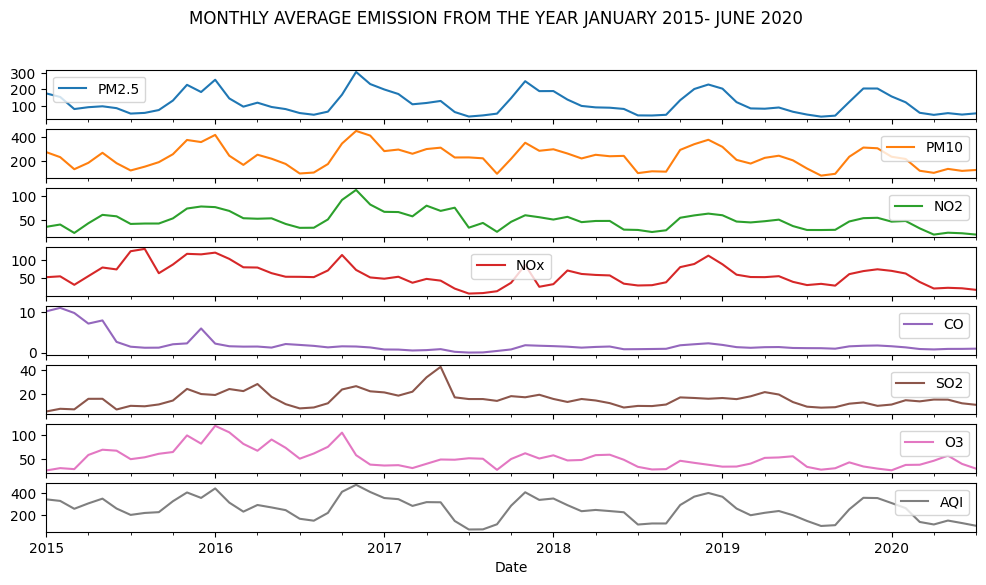

In [ ]:
df.resample('M').mean().plot(subplots=True,figsize=(12, 6),title='MONTHLY AVERAGE EMISSION FROM THE YEAR JANUARY 2015- JUNE 2020')
plt.show()

**Augmented Dickey Fuller Test (ADF Test)**

In [ ]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df['AQI'])
print('pvalue of adfuler test is:',adftest[1])

pvalue of adfuler test is: 0.009112329964031596


In [ ]:
final_df = df.resample('M').mean()

**Implementing the Auto ARIMA model**

In [ ]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.7 MB/s eta 0:00:00


**Initialize the auto arima function**


In [ ]:
model = pm.auto_arima(final_df['AQI'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=751.256, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=811.611, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=721.831, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=749.203, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=945.014, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=764.235, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=714.121, Time=0.46 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=743.571, Time=0.22 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=716.497, Time=0.54 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=716.541, T

**Splitting the time series dataset**

In [ ]:
train = final_df[:57]
test = final_df[57:]


In [ ]:
print(len(train),len(test))

57 10


**Fitting the Auto ARIMA model**

In [ ]:
# import itertools
# pdq_combination = list(itertools.product(p,d,q))
# len(pdq_combination)

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# for pdq in pdq_combination:
#   try:
#     model=ARIMA(train,order=pdq).fit()
#     pred=model.predict(start=len(train['AQI']),end=(len(final_df)-1))
#     error=np.sqrt(mean_squared_error(test['AQI'],pred[0]))
#     order1.append(pdq)
#     rmse.append(error)
#   except:
#       continue

In [ ]:
model.fit(train['AQI'])

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

**Using the Auto ARIMA model to make predictions**

In [ ]:
pred = model.predict(n_periods=10, return_conf_int=True)
# pred = model.predict(start=len(train), end=len(final_df)-1)
pred = pd.DataFrame(pred[0],index = test.index,columns=['Prediction'])
pred


,Prediction
Date,
2019-10-31,271.565071
2019-11-30,361.411344
2019-12-31,348.075630
2020-01-31,345.348406
2020-02-29,282.528471
2020-03-31,228.639564
2020-04-30,255.107754
2020-05-31,260.417075
2020-06-30,211.140948


In [ ]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(test['AQI'],pred))
error

72.64932974877928

**Plotting the Pandas data frame**

<Axes: xlabel='Date'>

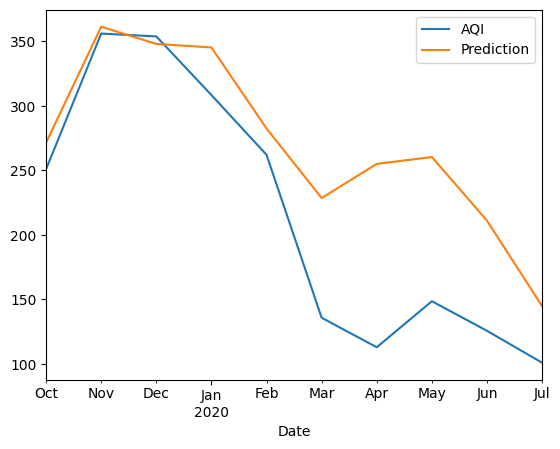

In [ ]:
pd.concat([test['AQI'],pred],axis=1).plot()

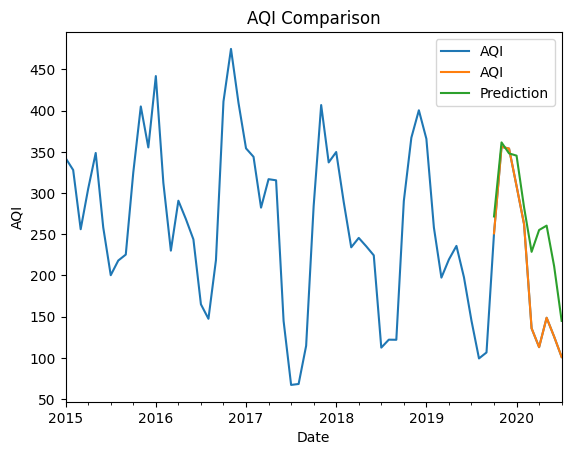

In [ ]:
a1 = final_df['AQI']
b1 = test['AQI']
concatenated = pd.concat([a1,b1,pred],axis=1)
concatenated.plot(legend = True)
plt.title('AQI Comparison')
plt.xlabel('Date')
plt.ylabel('AQI')

# Show the plot
plt.show()

In [ ]:
# original_values = np.array(final_df['AQI'])


# # Create a dataframe with original and predicted values
# df = pd.DataFrame({'Actual AQI': test['AQI'], 'Predicted AQI': pred['Prediction']})

# # Calculate the difference between original and predicted values
# df['Difference'] = df['Actual AQI'] - df['Predicted AQI']

# # Calculate the percentage error
# df['Percentage Error'] =abs( (df['Difference'] / df['Actual AQI']) * 100 )

# df = pd.DataFrame(df)

# # Print the dataframe
# print(df)


# **Calculating Hurst Exponent**

In [ ]:
!pip install nolds


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Hurst Exponent for the whole Dataset**

In [ ]:
import pandas as pd
from nolds import hurst_rs

# Assuming your air quality dataset is in a pandas DataFrame named 'data' with a DateTime index

# Extract the values from the DataFrame
values = df.values.flatten()

# Calculate the Hurst exponent for the whole dataset
hurst_exponent = hurst_rs(values)

# Print the Hurst exponent
print("Hurst Exponent for the Whole Dataset:", hurst_exponent)


Hurst Exponent for the Whole Dataset: 0.7367350885479488


# **Hurst Exponent Yearly**

In [ ]:
import pandas as pd
from nolds import hurst_rs

# Assuming your air quality dataset is in a pandas DataFrame named 'data' with a DateTime index

# Calculate the Hurst exponent for each year
yearly_hurst_exponents = {}

for year, group in df.groupby(df.index.year):
    values = group.values.flatten()
    hurst_exponent = hurst_rs(values)
    yearly_hurst_exponents[year] = hurst_exponent

# Print the Hurst exponent for each year
for year, hurst_exponent in yearly_hurst_exponents.items():
    print(f"Hurst Exponent for Year {year}: {hurst_exponent}")


Hurst Exponent for Year 2015: 0.4920451503432296
Hurst Exponent for Year 2016: 0.4911444557893816
Hurst Exponent for Year 2017: 0.6769532188409533
Hurst Exponent for Year 2018: 0.6735248345710598
Hurst Exponent for Year 2019: 0.6196568112058745
Hurst Exponent for Year 2020: 0.4669212289752006


In [ ]:
from nolds import hurst_rs

# Calculate the fractal dimension (D) for each year
yearly_fractal_dimensions = {year: 2 - hurst for year, hurst in yearly_hurst_exponents.items()}

# Print the fractal dimension (D) for each year
for year, d in yearly_fractal_dimensions.items():
    print(f"Fractal Dimension (D) for Year {year}: {d}")


Fractal Dimension (D) for Year 2015: 1.5079548496567705
Fractal Dimension (D) for Year 2016: 1.5088555442106184
Fractal Dimension (D) for Year 2017: 1.3230467811590467
Fractal Dimension (D) for Year 2018: 1.3264751654289402
Fractal Dimension (D) for Year 2019: 1.3803431887941255
Fractal Dimension (D) for Year 2020: 1.5330787710247993


In [ ]:
index_future_dates=pd.date_range(start='2020-07-30',end='2020-08-30')
#print(index_future_dates)
pred=model.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)

print(pred)

2019-10-31    271.565071
2019-11-30    361.411344
2019-12-31    348.075630
2020-01-31    345.348406
2020-02-29    282.528471
2020-03-31    228.639564
2020-04-30    255.107754
2020-05-31    260.417075
2020-06-30    211.140948
2020-07-31    144.851757
Freq: M, Name: ARIMA Predictions, dtype: float64


<Axes: >

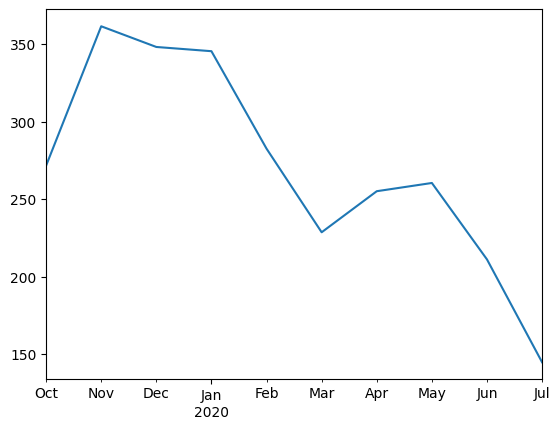

In [ ]:
pred.plot()